In [41]:
import os
import csv

ROOT = "./result-adaxeval"

base_lang = "ja"
# baseline_model = "llm-jp-3-13b-exp1-en"
if base_lang == "en":
    baseline_model = "llm-jp-3-13b-exp1-en_jstage"
if base_lang == "ja":
    baseline_model = "llm-jp-3-13b-exp1-ja"


models = [
    # "llm-jp-3-13b-exp2-medical-en_jstage",
    # "llm-jp-3-13b-exp3-balanced-en_jstage",
    # "llm-jp-3-13b-exp3-science-en_jstage",
    # "llm-jp-3-13b-exp3-medical-en_jstage",

    "llm-jp-3-13b-exp2-medical-ja",
    "llm-jp-3-13b-exp3-balanced-ja",
    "llm-jp-3-13b-exp3-science-ja",
    "llm-jp-3-13b-exp3-medical-ja",


    # "llm-jp-3-13b-exp2-medical-ja",
    # "llm-jp-3-13b-exp3-medical-ja",
    "llm-jp-3-13b-exp4-medical-ja",
    "llm-jp-3-13b-exp5-medical-ja"

    # "llm-jp-3-13b-exp2-medical-en_jstage",
    # "llm-jp-3-13b-exp3-medical-en_jstage",
    # "llm-jp-3-13b-exp4-medical-en_jstage",
    # "llm-jp-3-13b-exp5-medical-en_jstage"
]

model_names = {
    "llm-jp-3-13b-exp2-medical-en_jstage": "Medical-Japanese",
    "llm-jp-3-13b-exp2-medical-ja": "Medical-English",
    
    "llm-jp-3-13b-exp3-balanced-ja": "Balanced-Translation",
    "llm-jp-3-13b-exp3-science-ja": "Scientific-Translation",
    "llm-jp-3-13b-exp3-medical-ja": "Medical-Translation",
    "llm-jp-3-13b-exp3-balanced-en": "Balanced-Translation",
    "llm-jp-3-13b-exp3-science-en": "Scientific-Translation",
    "llm-jp-3-13b-exp3-medical-en": "Medical-Translation",
    "llm-jp-3-13b-exp3-balanced-en_jstage": "Balanced-Translation",
    "llm-jp-3-13b-exp3-science-en_jstage": "Scientific-Translation",
    "llm-jp-3-13b-exp3-medical-en_jstage": "Medical-Translation",
    
    "llm-jp-3-13b-exp4-science-ja": "Scientific-Roman",
    "llm-jp-3-13b-exp4-medical-ja": "Medical-Roman",
    "llm-jp-3-13b-exp4-science-en": "Scientific-Roman",
    "llm-jp-3-13b-exp4-medical-en": "Medical-Roman",
    "llm-jp-3-13b-exp4-science-en_jstage": "Scientific-Roman",
    "llm-jp-3-13b-exp4-medical-en_jstage": "Medical-Roman",
    
    "llm-jp-3-13b-exp5-medical-ja": "Medical-Roman2En",
    "llm-jp-3-13b-exp5-medical-en_jstage": "Medical-Roman2En",
}

template = "prompt"
num_shot = 0

# prompt_tasks = [
#         "nii_en5_mono_prompt-en", "nii_en5_mono_prompt-ja",
#         "nii_en5_bi_prompt-en", "nii_en5_bi_prompt-ja",
#         "nii_en5_tri_prompt-en", "nii_en5_tri_prompt-ja",
#         "nii_ja5_mono_prompt-en", "nii_ja5_mono_prompt-ja",
#         "nii_ja5_bi_prompt-en", "nii_ja5_bi_prompt-ja",
#         "nii_ja5_tri_prompt-en", "nii_ja5_tri_prompt-ja"
#     ]
prompt_tasks = [
    "adaxeval-en_knowledge_memorization",
    "adaxeval-ja_knowledge_memorization",
    "adaxeval-en_knowledge_generalization",
    "adaxeval-ja_knowledge_generalization"
]

In [42]:
import pandas as pd
from utils import get_task_name, parse_eval_info, parse_train_info, read_accs_from_folder

is_ood, delta_acc = False, False
dfs = []
for model_name in models:
    result_dir = os.path.join(ROOT, f"{model_name}_{template}_{str(num_shot)}-shot")
    dfs.append(read_accs_from_folder(result_dir, model_name, is_ood=is_ood, delta_acc=delta_acc, namedicts=model_names))
df = pd.concat(dfs, axis=0)

baseline_accs = []
baseline_filename = os.path.join(ROOT, f"{baseline_model}_{template}_{str(num_shot)}-shot", "prompt.csv")
print("Baseline:", baseline_filename)
with open(baseline_filename, 'r') as csvfile:
    reader = csv.reader(csvfile)
    header = next(reader)
    for row in reader:
        task, acc = row[0], row[3]
        if task not in prompt_tasks:
            continue
        train_domain, train_lang = parse_train_info(baseline_model)
        eval_domain, eval_type, eval_lang = parse_eval_info(task)
        task = get_task_name(train_lang, eval_lang, train_domain, eval_domain)
        baseline_accs.append({
            "train_domain": train_domain, 
            "train_lang": train_lang,
            "eval_domain": eval_domain,
            "eval_type": eval_type,
            "eval_lang": eval_lang,
            "model_name": baseline_model,
            "task": task,
            "acc": float(acc)
        })
baseline_accs = pd.DataFrame(baseline_accs)

Baseline: ./result-adaxeval/llm-jp-3-13b-exp1-ja_prompt_0-shot/prompt.csv


In [43]:
_df = df[df["eval_type"].str.contains("gen")]
rename_dict = {"model_name": "Translation Data", "task": "Evaluation Data"}
_df.rename(columns=rename_dict, inplace=True)
# plot_acc(_df, "CPT llm-jp-13B with 0.5B Japanese Data & 0.5B CLT data \n(knowledge prompt evaluation)")
# plot_acc(_df, "CPT with 0.5B Japanes J-stage & 0.5B CLT data \n(knowledge prompt evaluation)", rename_dict)

/tmp/ipykernel_2360166/1494185348.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.rename(columns=rename_dict, inplace=True)


JA base
JA base


/tmp/ipykernel_2360166/2294068772.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=1.5, rect=[0, 0, 1, 1])  # Adjust rect to reserve space at the bottom for legend


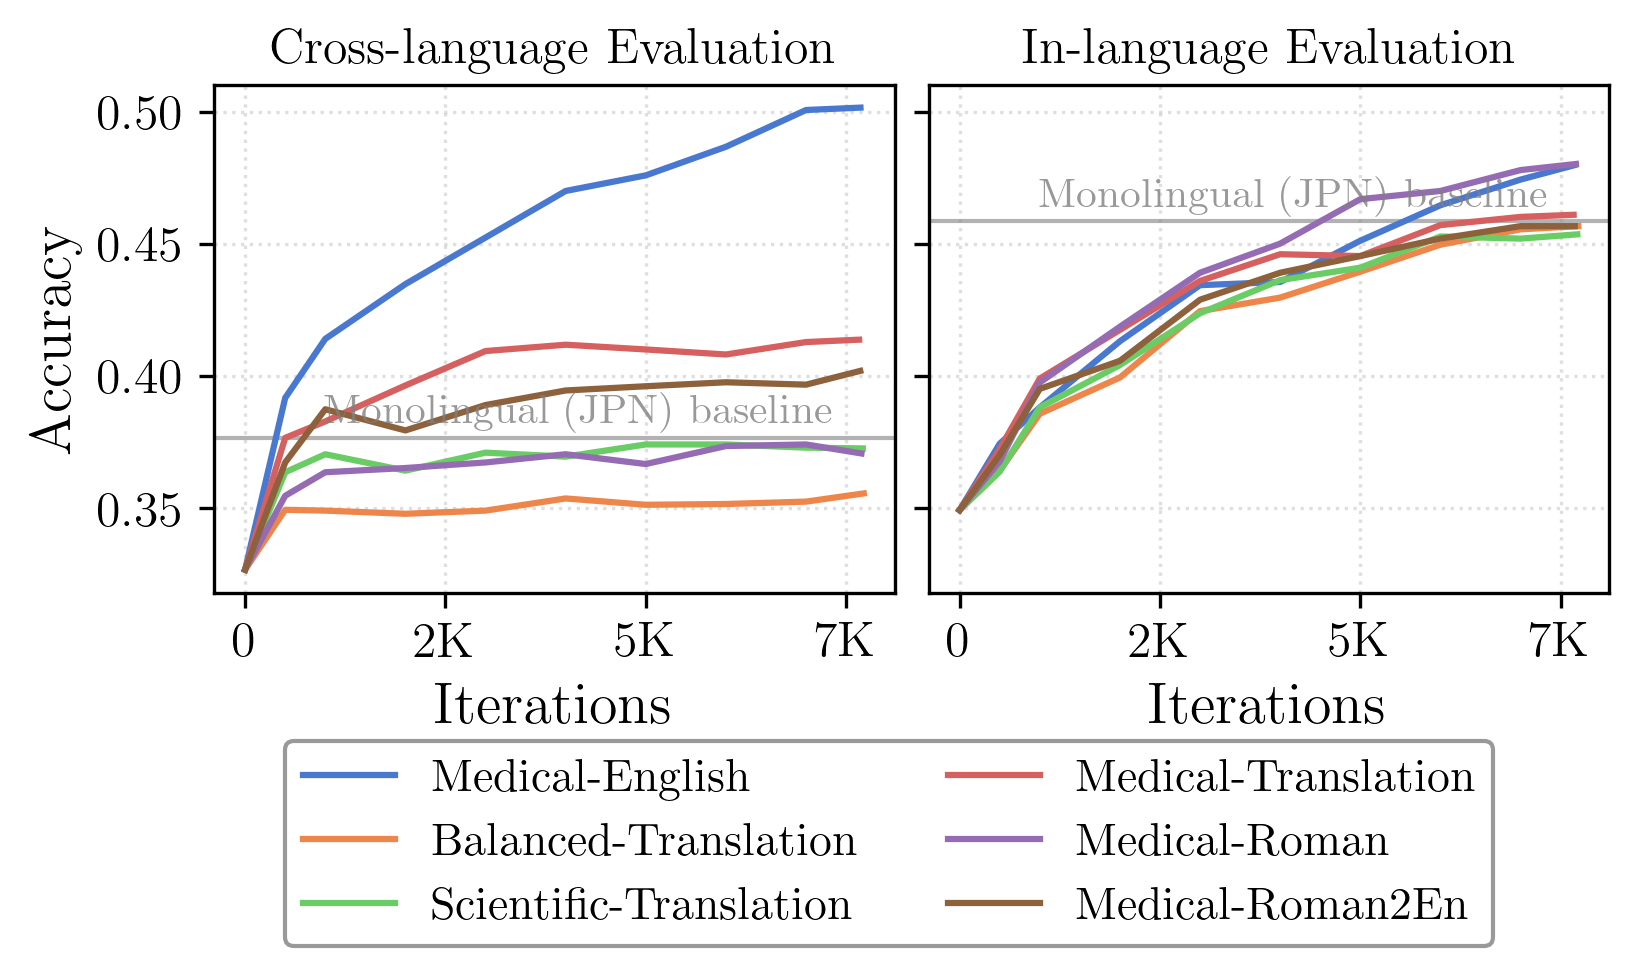

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams
import os

# Configure matplotlib for LaTeX-style rendering
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['text.usetex'] = True
rcParams['figure.dpi'] = 300

def plot_acc_improved(_df_filtered, title_suffix, rename_dict, ax, eval_type, baseline_accs):
    base_df_filtered = baseline_accs[(baseline_accs['eval_type'] == 'gen') & (baseline_accs['task'] == eval_type)]
    if not base_df_filtered.empty:
        baseline_value = base_df_filtered.iloc[0]['acc']
        ax.axhline(y=baseline_value, linestyle='-', color='gray', linewidth=1, alpha=0.6)
        line_name = 'Monolingual (JPN) baseline' if base_lang == "ja" else 'Monolingual (ENG) baseline'
        ax.text(x=_df_filtered['iter_num'].max() * 0.95, y=baseline_value + 0.002,
                s=line_name, color='gray', fontsize=10, verticalalignment='bottom',
                horizontalalignment='right', alpha=0.8)

    sns.lineplot(data=_df_filtered, x='iter_num', y='acc', hue=rename_dict['model_name'],
                 style=rename_dict['task'], markers=False, ax=ax, palette='muted')

    ax.set_xlabel("Iterations", fontsize=14)
    ax.set_ylabel("Accuracy", fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'{int(x / 1000)}K' if x != 0 else '0'))
    ax.grid(True, linestyle=':', alpha=0.4)
    if base_lang == "en":
        print("EN base")
        if eval_type == 'AdaXEval-Ja':
            title = "Cross-language Evaluation"
        else:
            title = "In-language Evaluation"
    else:
        print("JA base")
        if eval_type == 'AdaXEval-Ja':
            title = "In-language Evaluation"
        else:
            title = "Cross-language Evaluation"
    ax.set_title(title, fontsize=12, pad=5)
    # ax.set_ylim(0.28, 0.45)

    # Create legend without "Evaluation Data" title
    handles, labels = ax.get_legend_handles_labels()
    model_labels = [l for l in labels if l in _df_filtered[rename_dict['model_name']].unique()]
    model_handles = [h for h, l in zip(handles, labels) if l in model_labels]
    ax.legend(handles=model_handles, labels=model_labels, loc='center left', bbox_to_anchor=(1.05, 0.5),
              title=None, fontsize=12, frameon=True, facecolor='white', edgecolor='gray')

# Prepare the DataFrame
_df = df[df["eval_type"].str.contains("gen")].copy()
rename_dict = {"model_name": "Translation Data", "task": "Evaluation Data"}
_df.rename(columns={"model_name": "Translation Data", "eval_type": "Evaluation Data"}, inplace=True)

# Create figure and axes with tighter layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2.2), sharey=True, gridspec_kw={'wspace': 0.05})

# Plot data
df_en = _df[_df['eval_lang'] == 'en'].copy()
plot_acc_improved(df_en, "on AdaXEval-En", rename_dict, ax1, 'AdaXEval-En', baseline_accs)

df_ja = _df[_df['eval_lang'] == 'ja'].copy()
plot_acc_improved(df_ja, "on AdaXEval-Ja", rename_dict, ax2, 'AdaXEval-Ja', baseline_accs)

# Adjust layout to minimize white space
fig.tight_layout(pad=1.5, rect=[0, 0, 1, 1])  # Adjust rect to reserve space at the bottom for legend

# Remove individual subplot legends
ax1.get_legend().remove()
ax2.get_legend().remove()

# Create a unified legend at the bottom as one row
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles1 + handles2
all_labels = labels1 + labels2
unique_labels = list(dict.fromkeys([l for l in all_labels if l in _df['Translation Data'].unique()]))
unique_handles = [h for h, l in zip(all_handles, all_labels) if l in unique_labels]

# fig.legend(unique_handles, unique_labels, loc='lower center', ncol=len(unique_labels),
#            title=None, fontsize=11, frameon=True, facecolor='white', edgecolor='gray', 
#            bbox_to_anchor=(0.5, -0.25))

fig.legend(unique_handles, unique_labels, loc='lower center', ncol=2,
           title=None, fontsize=11, frameon=True, facecolor='white', edgecolor='gray', 
           bbox_to_anchor=(0.5, -0.46))

# plt.show()
result_dir = "./figures"
if base_lang == "en":
    plt.savefig(os.path.join(result_dir, f"multilingual-en_jstage.all.pdf"), dpi=300, bbox_inches='tight')
    # plt.savefig(os.path.join(result_dir, f"multilingual-translation-en_jstage.with_raw.pdf"), dpi=300, bbox_inches='tight')
    # plt.savefig(os.path.join(result_dir, f"multilingual-strategy-en_jstage.with_raw.pdf"), dpi=300, bbox_inches='tight')
else:
    plt.savefig(os.path.join(result_dir, f"multilingual-ja.all.pdf"), dpi=300, bbox_inches='tight')